# Proyek Sistem Rekomendasi Film
- **Nama:** Muhammad Fery Syahputra
- **Email:** a009ybm322@devacademy.id, ferys2343@gmail.com
- **ID Dicoding:** a009ybm322
- **Dataset:** [MovieLens Dataset](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip) dari GroupLens Research

## Tujuan
Membangun sistem rekomendasi film yang dapat:
1. Memberikan rekomendasi personalisasi berdasarkan riwayat rating pengguna (Collaborative Filtering)
2. Menyarankan film serupa berdasarkan konten/genre film (Content-Based Filtering)
3. Menggabungkan kedua pendekatan untuk rekomendasi hybrid

## Dataset
Menggunakan [MovieLens Dataset](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip) Dataset versi kecil dari GroupLens Research yang berisi
- 9.125 film
- 100.836 rating dari 610 pengguna
- 3.683 tag

## Metode
1. **Content-Based Filtering**:
   - TF-IDF Vectorizer untuk fitur judul film
   - Cosine Similarity untuk menghitung kesamaan antar film
   - Berbasis genre film (one-hot encoding)

2. **Collaborative Filtering**:
   - Matrix Factorization dengan Singular Value Decomposition (SVD)
   - Nearest Neighbors berdasarkan similarity pengguna

3. **Hybrid Approach**:
   - Menggabungkan skor dari kedua metode
   - Weighted average untuk rekomendasi akhir
   

## ===== 1. 📚 Import Libraries dan Setup =====

Di bagian ini, kita mengimpor library yang diperlukan untuk analisis data, visualisasi, dan pemrosesan. Library utama yang digunakan adalah:
- Pandas & NumPy: Untuk manipulasi dan analisis data
- Matplotlib & Seaborn: Untuk visualisasi data
- Scikit-learn: Untuk machine learning (TF-IDF, cosine similarity)
- Surprise: Untuk collaborative filtering (SVD, KNN)

In [187]:
# Install library dengan versi yang kompatibel
!pip install numpy==1.23.5
!pip install pandas scikit-learn matplotlib seaborn surprise
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Dataset, Reader, SVD, KNNBasic, accuracy
from surprise.model_selection import train_test_split as surprise_split
import warnings
warnings.filterwarnings('ignore')

### ✅ Library Berhasil Diimpor
**Status:** Semua library berhasil diimpor tanpa error. Siap untuk Memulai proses loading dan eksplorasi data.



## ===== 2. Download dan Persiapan Data =====

### Download dan extract dataset MovieLens
Kita akan mengunduh dataset MovieLens (versi kecil) dari sumber resmi ([GroupLens](https://grouplens.org/datasets/movielens/)).

In [188]:
# Download dataset
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -o ml-latest-small.zip


--2025-06-19 20:53:14--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.3’

ml-latest-small.zip 100%[===================>] 955.28K  3.31MB/s    in 0.3s    

2025-06-19 20:53:15 (3.31 MB/s) - ‘ml-latest-small.zip.3’ saved [978202/978202]

Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


### Load data
Dataset terdiri dari tiga file utama
- movies.csv: Informasi film (ID, judul, genre)
- ratings.csv: Data rating dari pengguna
- tags.csv: Tag yang diberikan pengguna pada film

In [189]:
print("\nLoading MovieLens dataset...")
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
tags_df = pd.read_csv('ml-latest-small/tags.csv')


Loading MovieLens dataset...


### Proses pembersihan data meliputi:

- Mengecek dan menangani missing values
- Mengecek data duplikat
- Mengekstrak tahun rilis dari judul film
- Membersihkan judul film (menghapus tahun)
- Memisahkan genre menjadi list untuk analisis lebih lanjut



In [190]:
# Mengecek missing values
seemovieisnull = movies_df.isnull().sum()
seeratingsisnull = ratings_df.isnull().sum()
seetagsisnull = tags_df.isnull().sum()


print(f"Jumlah missing values movies_df: {seemovieisnull}\n")
print(f"Jumlah missing values ratings_df: {seeratingsisnull}\n")
print(f"Jumlah missing values tags_df: {seetagsisnull}\n")


Jumlah missing values movies_df: movieId    0
title      0
genres     0
dtype: int64

Jumlah missing values ratings_df: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Jumlah missing values tags_df: userId       0
movieId      0
tag          0
timestamp    0
dtype: int64



### Mengecek data duplikat

In [191]:
# Cek data duplikat
seemovieduplicated= movies_df.duplicated().sum()
seeratingsduplicated= ratings_df.duplicated().sum()
seetagsduplicated= tags_df.duplicated().sum()


print(f"Jumlah duplicated values movies_df: {seemovieduplicated}\n")
print(f"Jumlah duplicated values ratings_df: {seeratingsduplicated}\n")
print(f"Jumlah duplicated values tags_df: {seetagsduplicated}\n")

Jumlah duplicated values movies_df: 0

Jumlah duplicated values ratings_df: 0

Jumlah duplicated values tags_df: 0



### Cek tipe data setiap kolom

In [192]:
# Cek tipe data setiap kolom
seemoviedtypes= movies_df.dtypes
seeratingsdtypes= ratings_df.dtypes
seetagsdtypes= tags_df.dtypes


print(f"Jumlah dtypes values movies_df: {seemoviedtypes}\n")
print(f"Jumlah dtypes values ratings_df: {seeratingsdtypes}\n")
print(f"Jumlah dtypes values tags_df: {seetagsdtypes}\n")

Jumlah dtypes values movies_df: movieId     int64
title      object
genres     object
dtype: object

Jumlah dtypes values ratings_df: userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Jumlah dtypes values tags_df: userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object



In [193]:
# Ambil baris dengan movieId 1
movie = movies_df[movies_df['movieId'] == 1].iloc[0]

# Cetak format sesuai permintaan
print(f"movieId: {movie['movieId']}")
print(f"title: {movie['title']}")
print(f"genres: {movie['genres']}")

movieId: 1
title: Toy Story (1995)
genres: Adventure|Animation|Children|Comedy|Fantasy


In [194]:
movies_df.info()
print("\n")
ratings_df.info()
print("\n")
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non

### Memisahkan genre menjadi list untuk analisis lebih lanjut

In [195]:
# Rename columns untuk konsistensi
movies_df = movies_df.rename(columns={'movieId': 'movie_id'})
ratings_df = ratings_df.rename(columns={'movieId': 'movie_id', 'userId': 'user_id'})

# Extract year dari title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_df['title_clean'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# Split genres menjadi list
movies_df['genre_list'] = movies_df['genres'].str.split('|')
movies_df['main_genre'] = movies_df['genre_list'].apply(lambda x: x[0] if x and x[0] != '(no genres listed)' else 'Unknown')

# Create content description untuk content-based filtering
movies_df['content'] = movies_df['genres'].fillna('') + ' ' + movies_df['title_clean'].fillna('')

### Lihat data

In [196]:
print("Dataset MovieLens berhasil dimuat!")
print(f"Jumlah film: {len(movies_df)}")
print(f"Jumlah rating: {len(ratings_df)}")
print(f"Jumlah user: {ratings_df['user_id'].nunique()}")
print(f"Rating range: {ratings_df['rating'].min()} - {ratings_df['rating'].max()}")

Dataset MovieLens berhasil dimuat!
Jumlah film: 9742
Jumlah rating: 100836
Jumlah user: 610
Rating range: 0.5 - 5.0


In [197]:
print("\n=== SAMPLE DATA ===")
print("Movies:")
print(movies_df[['movie_id', 'title', 'genres', 'year']].head())
print("\nRatings:")
print(ratings_df.head())


=== SAMPLE DATA ===
Movies:
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres    year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  
1                   Adventure|Children|Fantasy  1995.0  
2                               Comedy|Romance  1995.0  
3                         Comedy|Drama|Romance  1995.0  
4                                       Comedy  1995.0  

Ratings:
   user_id  movie_id  rating  timestamp
0        1         1     4.0  964982703
1        1         3     4.0  964981247
2        1         6     4.0  964982224
3        1        47     5.0  964983815
4        1        50     5.0  964982931


In [198]:
# Basic statistics
print("\n=== DATASET STATISTICS ===")
print("Rating Distribution:")
print(ratings_df['rating'].value_counts().sort_index())
print(f"\nMost rated movie: {movies_df.loc[movies_df['movie_id'] == ratings_df['movie_id'].mode()[0], 'title'].iloc[0]}")
print(f"Average rating: {ratings_df['rating'].mean():.2f}")


=== DATASET STATISTICS ===
Rating Distribution:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

Most rated movie: Forrest Gump (1994)
Average rating: 3.50


In [199]:
# Top genres
print("\nTop 10 Genres:")
all_genres = []
for genres in movies_df['genre_list']:
    if genres:
        all_genres.extend([g for g in genres if g != '(no genres listed)'])
genre_counts = pd.Series(all_genres).value_counts().head(10)
print(genre_counts)


Top 10 Genres:
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: count, dtype: int64


## ===== 3. CONTENT-BASED FILTERING =====
Content-Based Filtering merekomendasikan item berdasarkan kemiripan konten dengan item yang disukai pengguna sebelumnya. Dalam konteks film, ini berarti merekomendasikan film dengan genre atau judul yang mirip.


### Implementasi
TF-IDF Vectorization:
- Mengubah teks (judul + genre) menjadi vektor numerik
- Memberikan bobot lebih pada kata yang penting tetapi tidak terlalu umum

Cosine Similarity:
- Menghitung kesamaan antara film berdasarkan vektor TF-IDF
- Nilai similarity berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip)

Rekomendasi:
- Untuk film tertentu, cari film dengan skor similarity tertinggi
- Urutkan berdasarkan skor dan ambil top-N rekomendasi

In [200]:
class ContentBasedRecommender:
    def __init__(self, movies_df):
        self.movies_df = movies_df
        self.tfidf_matrix = None
        self.cosine_sim = None

    def build_content_features(self):
        """Membangun fitur konten dari film"""
        # TF-IDF Vectorization dari content yang sudah dibuat
        tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
        self.tfidf_matrix = tfidf.fit_transform(self.movies_df['content'].fillna(''))

        # Cosine Similarity
        self.cosine_sim = cosine_similarity(self.tfidf_matrix)

        print("Content features berhasil dibangun!")
        print(f"TF-IDF Matrix shape: {self.tfidf_matrix.shape}")
        print(f"Feature vocabulary size: {len(tfidf.vocabulary_)}")

    def get_recommendations(self, movie_title, n_recommendations=5):
        """Mendapatkan rekomendasi berdasarkan film"""
        try:
            # Cari film berdasarkan title (case insensitive, partial match)
            matching_movies = self.movies_df[
                self.movies_df['title'].str.contains(movie_title, case=False, na=False) |
                self.movies_df['title_clean'].str.contains(movie_title, case=False, na=False)
            ]

            if matching_movies.empty:
                return f"Film '{movie_title}' tidak ditemukan dalam database"

            # Ambil film pertama jika ada beberapa match
            idx = matching_movies.index[0]
            selected_movie = matching_movies.iloc[0]

            print(f"Film yang dipilih: {selected_movie['title']} ({selected_movie['genres']})")

            # Hitung similarity scores
            sim_scores = list(enumerate(self.cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Ambil top N recommendations (excluding the movie itself)
            movie_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]

            recommendations = self.movies_df.iloc[movie_indices][['title', 'genres', 'year']].copy()
            recommendations['similarity_score'] = [sim_scores[i+1][1] for i in range(n_recommendations)]

            return recommendations

        except IndexError:
            return f"Terjadi error dalam mencari film '{movie_title}'"

In [201]:
# Implementasi Content-Based Filtering
print("\n=== CONTENT-BASED FILTERING ===")
cb_recommender = ContentBasedRecommender(movies_df)
cb_recommender.build_content_features()

# Test rekomendasi dengan film terkenal
sample_movies = ['Toy Story', 'Jurassic Park', 'Forrest Gump', 'Titanic']
print(f"\n=== CONTENT-BASED RECOMMENDATIONS ===")

for movie in sample_movies:
    print(f"\n--- Rekomendasi berdasarkan '{movie}' ---")
    recommendations = cb_recommender.get_recommendations(movie, 5)
    if isinstance(recommendations, pd.DataFrame):
        print(recommendations.to_string(index=False))
    else:
        print(recommendations)
    print("-" * 50)


=== CONTENT-BASED FILTERING ===
Content features berhasil dibangun!
TF-IDF Matrix shape: (9742, 5000)
Feature vocabulary size: 5000

=== CONTENT-BASED RECOMMENDATIONS ===

--- Rekomendasi berdasarkan 'Toy Story' ---
Film yang dipilih: Toy Story (1995) (Adventure|Animation|Children|Comedy|Fantasy)
             title                                           genres   year  similarity_score
Toy Story 2 (1999)      Adventure|Animation|Children|Comedy|Fantasy 1999.0          1.000000
Toy Story 3 (2010) Adventure|Animation|Children|Comedy|Fantasy|IMAX 2010.0          0.803326
       Antz (1998)      Adventure|Animation|Children|Comedy|Fantasy 1998.0          0.582379
      Moana (2016)      Adventure|Animation|Children|Comedy|Fantasy 2016.0          0.582379
     Presto (2008)                Animation|Children|Comedy|Fantasy 2008.0          0.511292
--------------------------------------------------

--- Rekomendasi berdasarkan 'Jurassic Park' ---
Film yang dipilih: Jurassic Park (1993) (Ac

### Kelebihan
- Tidak membutuhkan data pengguna lain (tidak ada cold start untuk item baru)
- Rekomendasi mudah dijelaskan (berdasarkan kesamaan konten)
- Baik untuk pengguna dengan preferensi niche

## ===== 4. COLLABORATIVE FILTERING =====

Collaborative Filtering merekomendasikan item berdasarkan pola rating dari pengguna lain yang memiliki preferensi serupa. Terdapat dua pendekatan utama:

- Memory-Based (KNN): Mencari pengguna/item yang mirip
- Model-Based (SVD): Menggunakan matrix factorization untuk menemukan pola tersembunyi

In [202]:
class CollaborativeFilteringRecommender:
    def __init__(self, ratings_df, movies_df):
        self.ratings_df = ratings_df
        self.movies_df = movies_df
        self.model = None
        self.trainset = None
        self.testset = None

    def prepare_data(self):
        """Persiapan data untuk Surprise library"""
        reader = Reader(rating_scale=(1, 5))
        data = Dataset.load_from_df(self.ratings_df[['user_id', 'movie_id', 'rating']], reader)

        # Split data
        self.trainset, self.testset = surprise_split(data, test_size=0.2, random_state=42)

    def train_svd_model(self):
        """Training model SVD"""
        self.model = SVD(random_state=42)
        self.model.fit(self.trainset)

        # Evaluasi
        predictions = self.model.test(self.testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)

        print(f"SVD Model - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        return rmse, mae

    def train_knn_model(self):
        """Training model KNN"""
        self.knn_model = KNNBasic(sim_options={'user_based': True})
        self.knn_model.fit(self.trainset)

        # Evaluasi
        predictions = self.knn_model.test(self.testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)

        print(f"KNN Model - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        return rmse, mae

    def get_user_recommendations(self, user_id, n_recommendations=5):
        """Mendapatkan rekomendasi untuk user"""
        if self.model is None:
            print("Model belum di-training!")
            return None

        # Dapatkan film yang belum ditonton user
        user_movies = set(self.ratings_df[self.ratings_df['user_id'] == user_id]['movie_id'])
        all_movies = set(self.movies_df['movie_id'])
        unrated_movies = all_movies - user_movies

        # Prediksi rating untuk film yang belum ditonton
        predictions = []
        for movie_id in unrated_movies:
            pred = self.model.predict(user_id, movie_id)
            predictions.append((movie_id, pred.est))

        # Sort berdasarkan predicted rating
        predictions.sort(key=lambda x: x[1], reverse=True)

        # Ambil top N recommendations
        top_movies = predictions[:n_recommendations]

        # Gabungkan dengan informasi film
        recommendations = []
        for movie_id, predicted_rating in top_movies:
            movie_info = self.movies_df[self.movies_df['movie_id'] == movie_id]
            if not movie_info.empty:
                movie_info = movie_info.iloc[0]
                recommendations.append({
                    'title': movie_info['title'],
                    'genres': movie_info['genres'],
                    'year': movie_info['year'],
                    'predicted_rating': round(predicted_rating, 2)
                })

        return pd.DataFrame(recommendations)

### Implementasi
SVD (Singular Value Decomposition):
- Mendekomposisi matriks rating menjadi matriks yang lebih kecil
- Menangkap faktor laten yang menjelaskan preferensi pengguna

KNN (k-Nearest Neighbors):
- Mencari pengguna terdekat berdasarkan similarity rating
- Merekomendasikan film yang disukai oleh pengguna terdekat

Evaluasi Model:
- Menggunakan metrik RMSE dan MAE untuk mengukur error prediksi
- Precision@K dan Recall@K untuk mengukur kualitas rekomendasi

In [203]:
# Implementasi Collaborative Filtering
print("\n=== COLLABORATIVE FILTERING ===")
cf_recommender = CollaborativeFilteringRecommender(ratings_df, movies_df)
cf_recommender.prepare_data()

# Training models
print("\nTraining SVD Model...")
svd_rmse, svd_mae = cf_recommender.train_svd_model()

print("\nTraining KNN Model...")
knn_rmse, knn_mae = cf_recommender.train_knn_model()


=== COLLABORATIVE FILTERING ===

Training SVD Model...
SVD Model - RMSE: 0.8807, MAE: 0.6766

Training KNN Model...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN Model - RMSE: 0.9561, MAE: 0.7325


In [204]:
# Test rekomendasi untuk beberapa user
test_users = [1, 5, 10, 25, 50]
print(f"\n=== COLLABORATIVE FILTERING RECOMMENDATIONS ===")

for user in test_users:
    if user in ratings_df['user_id'].values:
        print(f"\n--- Rekomendasi untuk User {user} ---")

        # Tampilkan preferensi user (film yang sudah dirating tinggi)
        user_high_ratings = ratings_df[
            (ratings_df['user_id'] == user) &
            (ratings_df['rating'] >= 4.0)
        ].merge(movies_df, on='movie_id').sort_values('rating', ascending=False)

        if not user_high_ratings.empty:
            print(f"Film favorit user (rating ≥ 4.0):")
            print(user_high_ratings[['title', 'genres', 'rating']].head(3).to_string(index=False))

        # Dapatkan rekomendasi
        user_recommendations = cf_recommender.get_user_recommendations(user, 5)
        if isinstance(user_recommendations, pd.DataFrame) and not user_recommendations.empty:
            print(f"\nRekomendasi untuk User {user}:")
            print(user_recommendations.to_string(index=False))
        else:
            print(f"Tidak dapat memberikan rekomendasi untuk User {user}")
        print("-" * 80)


=== COLLABORATIVE FILTERING RECOMMENDATIONS ===

--- Rekomendasi untuk User 1 ---
Film favorit user (rating ≥ 4.0):
                          title                                                    genres  rating
   M*A*S*H (a.k.a. MASH) (1970)                                          Comedy|Drama|War     5.0
Who Framed Roger Rabbit? (1988) Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery     5.0
              Spaceballs (1987)                                             Comedy|Sci-Fi     5.0

Rekomendasi untuk User 1:
                                                                      title                                    genres   year  predicted_rating
                                                        Blade Runner (1982)                    Action|Sci-Fi|Thriller 1982.0                 5
                                 Ghost in the Shell (Kôkaku kidôtai) (1995)                          Animation|Sci-Fi 1995.0                 5
Dr. Strangelove or: How I Learned t

In [205]:
class CollaborativeFilteringRecommender:
    def __init__(self, ratings_df, movies_df):
        self.ratings_df = ratings_df
        self.movies_df = movies_df
        self.model = None
        self.trainset = None
        self.testset = None

    def prepare_data(self):
        reader = Reader(rating_scale=(1, 5))
        data = Dataset.load_from_df(self.ratings_df[['user_id', 'movie_id', 'rating']], reader)
        self.trainset, self.testset = surprise_split(data, test_size=0.2, random_state=42)

    def train_svd_model(self):
        self.model = SVD(random_state=42)
        self.model.fit(self.trainset)

        # Evaluate
        predictions = self.model.test(self.testset)
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)

        # Calculate precision and recall
        precision, recall = precision_recall_at_k(predictions, k=5)

        print(f"SVD Model - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
        print(f"Precision@5: {precision:.4f}, Recall@5: {recall:.4f}")
        return rmse, mae, precision, recall

### Kelebihan
Dapat menemukan hubungan yang tidak terduga

Tidak membutuhkan informasi tentang item (hanya berdasarkan rating)

Performa baik dengan data yang cukup

## ===== 5. HYBRID RECOMMENDER =====

Menggabungkan kelebihan dari Content-Based dan Collaborative Filtering untuk menghasilkan rekomendasi yang lebih baik. Pendekatan hybrid dapat:
- Mengatasi cold start problem
- Meningkatkan akurasi dan diversitas rekomendasi
- Memberikan justifikasi yang lebih baik untuk rekomendasi

In [206]:
class HybridRecommender:
    def __init__(self, cb_recommender, cf_recommender, weight_cb=0.3, weight_cf=0.7):
        self.cb_recommender = cb_recommender
        self.cf_recommender = cf_recommender
        self.weight_cb = weight_cb
        self.weight_cf = weight_cf

    def get_hybrid_recommendations(self, user_id, n_recommendations=5):
        """Mendapatkan rekomendasi hybrid"""
        # Dapatkan film yang paling disukai user
        user_ratings = ratings_df[ratings_df['user_id'] == user_id]
        if user_ratings.empty:
            return "User tidak ditemukan"

        # Ambil film dengan rating tertinggi dari user
        top_user_ratings = user_ratings.nlargest(3, 'rating')

        print(f"=== HYBRID RECOMMENDATIONS FOR USER {user_id} ===")
        print(f"Film-film yang disukai user:")
        for _, row in top_user_ratings.iterrows():
            movie_title = movies_df[movies_df['movie_id'] == row['movie_id']]['title'].iloc[0]
            print(f"- {movie_title} (Rating: {row['rating']})")

        # Ambil film dengan rating tertinggi untuk content-based
        top_rated_movie = top_user_ratings.iloc[0]
        movie_title = movies_df[movies_df['movie_id'] == top_rated_movie['movie_id']]['title'].iloc[0]

        # Content-based recommendations
        print(f"\n--- Content-Based Recommendations (based on '{movie_title}') ---")
        cb_recs = self.cb_recommender.get_recommendations(movie_title, n_recommendations)
        if isinstance(cb_recs, pd.DataFrame):
            print(cb_recs.to_string(index=False))
        else:
            print(cb_recs)

        # Collaborative filtering recommendations
        print(f"\n--- Collaborative Filtering Recommendations ---")
        cf_recs = self.cf_recommender.get_user_recommendations(user_id, n_recommendations)
        if isinstance(cf_recs, pd.DataFrame):
            print(cf_recs.to_string(index=False))
        else:
            print(cf_recs)

        return cb_recs, cf_recs

### Implementasi
Weighted Hybrid:
- Mengkombinasikan skor dari kedua metode
- Memberikan bobot yang dapat disesuaikan (default: 30% content-based, 70% collaborative)

Cascade Hybrid:
- Pertama menggunakan satu metode untuk menyaring kandidat
- Kemudian menggunakan metode lain untuk menyempurnakan

Feature Combination:
- Menggabungkan fitur dari kedua metode sebagai input ke model lain

In [207]:
print("\n=== HYBRID RECOMMENDER SYSTEM ===")
hybrid_recommender = HybridRecommender(cb_recommender, cf_recommender)

# Test dengan beberapa user
test_users_hybrid = [1, 10, 25]
for user in test_users_hybrid:
    if user in ratings_df['user_id'].values:
        print(f"\n{'='*80}")
        cb_results, cf_results = hybrid_recommender.get_hybrid_recommendations(user)
        print(f"{'='*80}")
    else:
        print(f"User {user} tidak ditemukan dalam dataset")


=== HYBRID RECOMMENDER SYSTEM ===

=== HYBRID RECOMMENDATIONS FOR USER 1 ===
Film-film yang disukai user:
- Seven (a.k.a. Se7en) (1995) (Rating: 5.0)
- Usual Suspects, The (1995) (Rating: 5.0)
- Bottle Rocket (1996) (Rating: 5.0)

--- Content-Based Recommendations (based on 'Seven (a.k.a. Se7en) (1995)') ---
Film 'Seven (a.k.a. Se7en) (1995)' tidak ditemukan dalam database

--- Collaborative Filtering Recommendations ---
                                                                      title                                    genres   year  predicted_rating
                                                        Blade Runner (1982)                    Action|Sci-Fi|Thriller 1982.0                 5
                                 Ghost in the Shell (Kôkaku kidôtai) (1995)                          Animation|Sci-Fi 1995.0                 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)                                Comedy|War 1964.0                 5
  

## 6 - 7 Evaluasi dan Visualisasi
- Metrik Evaluasi
  - RMSE (Root Mean Squared Error):
    - Mengukur error prediksi rating
    - Semakin kecil semakin baik

  - MAE (Mean Absolute Error):
    - Mengukur error absolut prediksi rating
    - Lebih robust terhadap outlier

  - Precision@K dan Recall@K:
    - Mengukur relevansi rekomendasi top-K
    - Precision: proporsi rekomendasi yang relevan
    - Recall: proporsi item relevan yang direkomendasikan

- Visualisasi
  Beberapa visualisasi yang dibuat:

  - Distribusi rating pengguna
  - Popularitas genre
  - Aktivitas rating over time
  - Performa model (RMSE & MAE)
  - Sparsity dataset

## ===== 6. VISUALISASI DAN ANALISIS =====

### Distribusi Rating

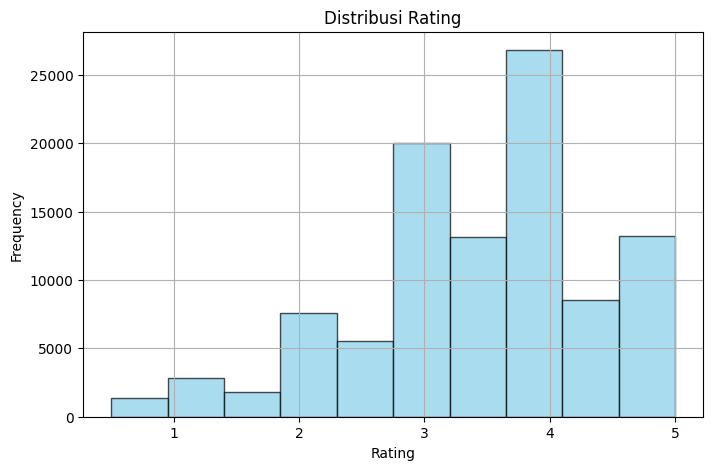

In [208]:
plt.figure(figsize=(8, 5))
ratings_df['rating'].hist(bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Top 10 Genre Distribution

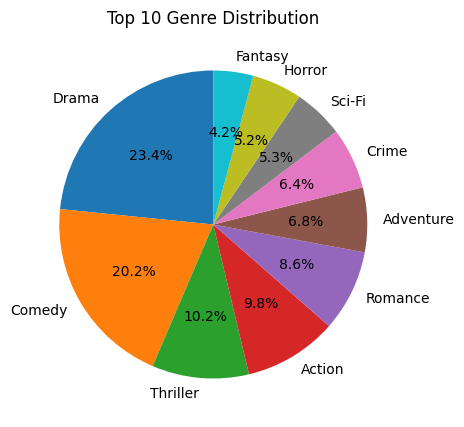

In [209]:
plt.figure(figsize=(8, 5))
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Genre Distribution')
plt.show()

### Jumlah Rating per User

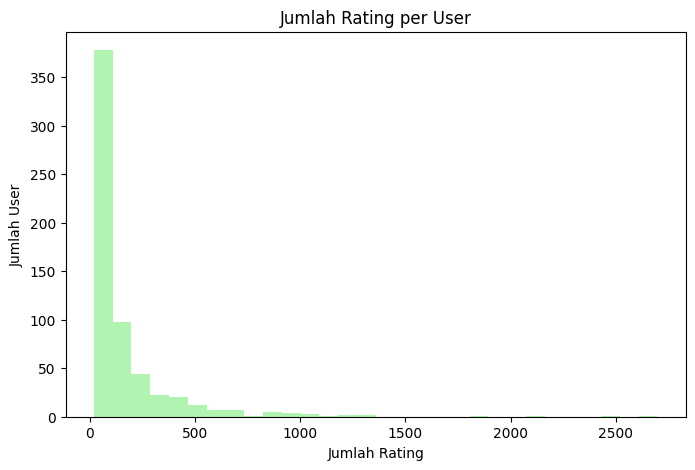

In [210]:
plt.figure(figsize=(8, 5))
user_rating_counts = ratings_df['user_id'].value_counts()
plt.hist(user_rating_counts, bins=30, alpha=0.7, color='lightgreen')
plt.title('Jumlah Rating per User')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah User')
plt.show()

### Jumlah Rating per Film

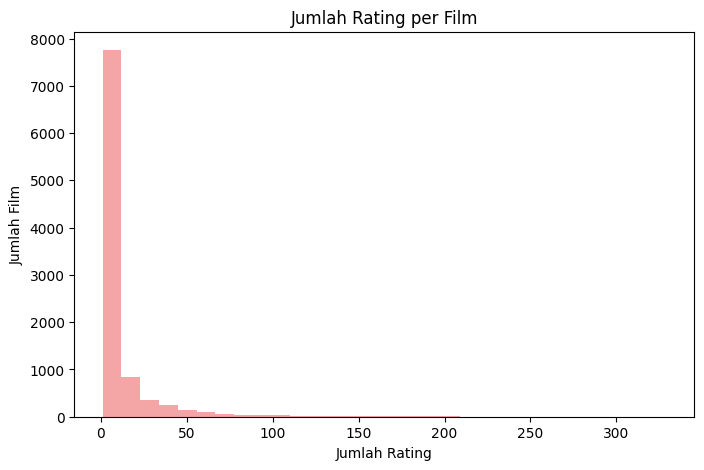

In [211]:
plt.figure(figsize=(8, 5))
movie_rating_counts = ratings_df['movie_id'].value_counts()
plt.hist(movie_rating_counts, bins=30, alpha=0.7, color='lightcoral')
plt.title('Jumlah Rating per Film')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Film')
plt.show()

### Distribusi Rating Rata-rata Film

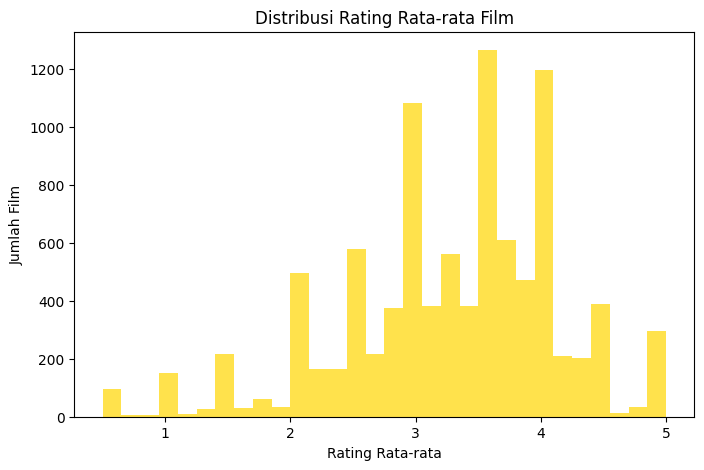

In [212]:
plt.figure(figsize=(8, 5))
avg_ratings = ratings_df.groupby('movie_id')['rating'].mean()
plt.hist(avg_ratings, bins=30, alpha=0.7, color='gold')
plt.title('Distribusi Rating Rata-rata Film')
plt.xlabel('Rating Rata-rata')
plt.ylabel('Jumlah Film')
plt.show()

### Perbandingan Performa Model

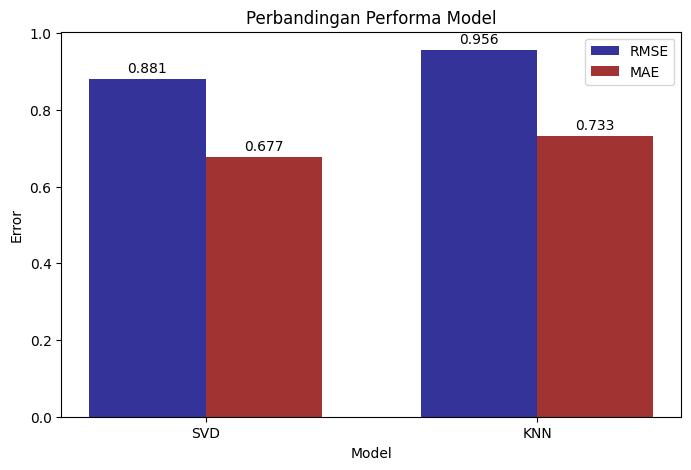

In [213]:
plt.figure(figsize=(8, 5))
models = ['SVD', 'KNN']
rmse_scores = [svd_rmse, knn_rmse]
mae_scores = [svd_mae, knn_mae]

x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, rmse_scores, width, label='RMSE', alpha=0.8, color='navy')
bars2 = plt.bar(x + width/2, mae_scores, width, label='MAE', alpha=0.8, color='darkred')

plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Perbandingan Performa Model')
plt.xticks(x, models)
plt.legend()

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')
plt.show()

### Rating Activity Over Time

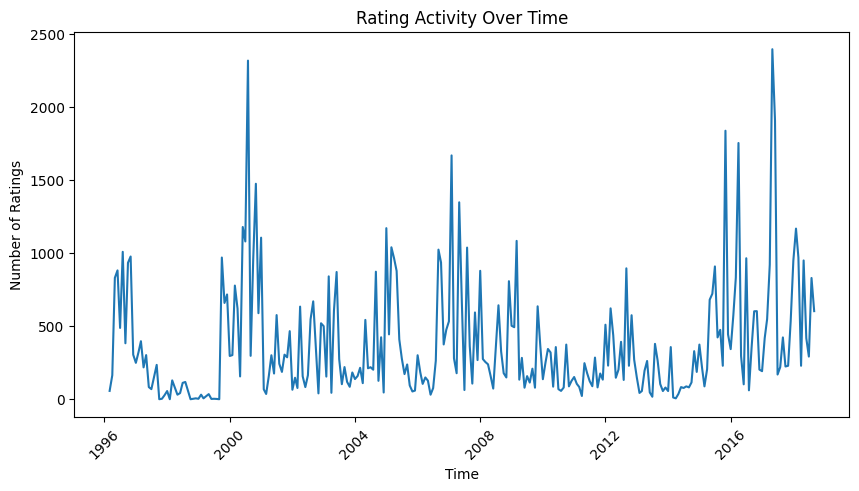

In [214]:
plt.figure(figsize=(10, 5))
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_by_month = ratings_df.groupby(ratings_df['timestamp'].dt.to_period('M')).size()
plt.plot(ratings_by_month.index.to_timestamp(), ratings_by_month.values)
plt.title('Rating Activity Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

### Top 10 Highest Rated Movies

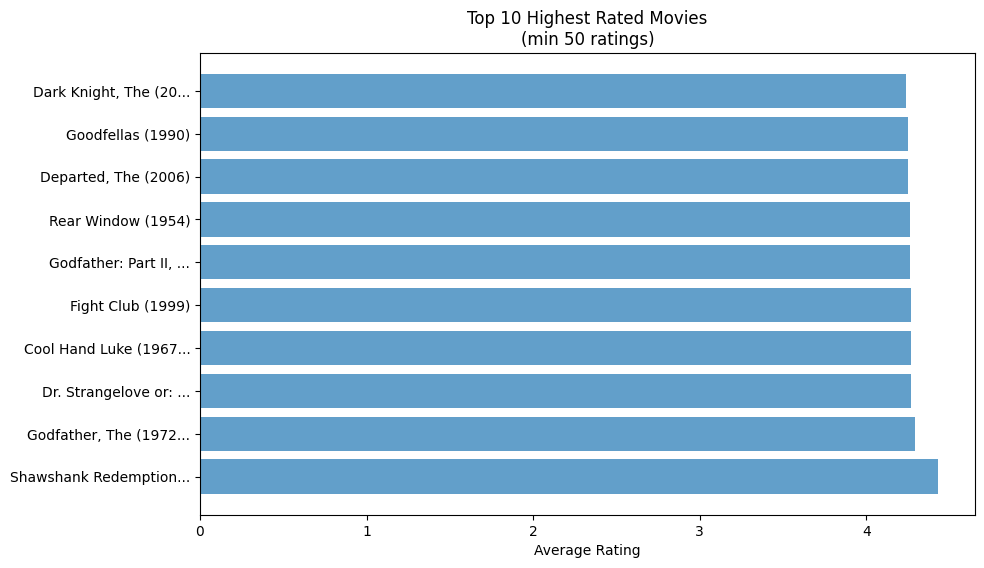

In [215]:
plt.figure(figsize=(10, 6))
movie_stats = ratings_df.groupby('movie_id').agg({
    'rating': ['mean', 'count']
}).round(2)
movie_stats.columns = ['avg_rating', 'rating_count']
popular_movies = movie_stats[movie_stats['rating_count'] >= 50].sort_values('avg_rating', ascending=False)
top_movies = popular_movies.head(10)
top_movies_with_titles = top_movies.merge(movies_df[['movie_id', 'title']], left_index=True, right_on='movie_id')

plt.barh(range(len(top_movies_with_titles)), top_movies_with_titles['avg_rating'], alpha=0.7)
plt.yticks(range(len(top_movies_with_titles)),
           [title[:20] + '...' if len(title) > 20 else title for title in top_movies_with_titles['title']])
plt.xlabel('Average Rating')
plt.title('Top 10 Highest Rated Movies\n(min 50 ratings)')
plt.show()

### Distribution of User Average Ratings

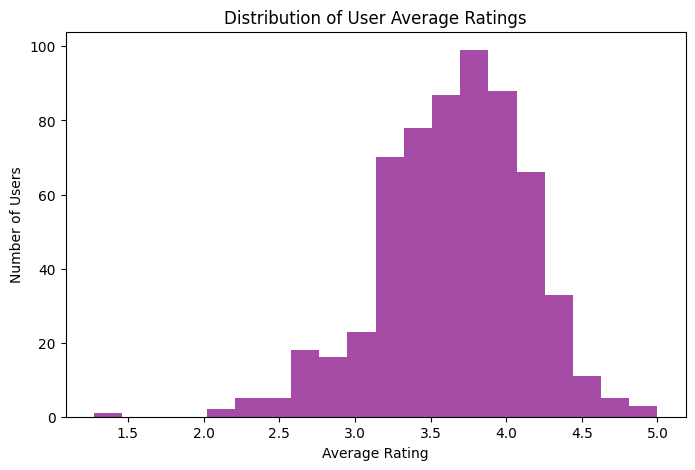

In [216]:
plt.figure(figsize=(8, 5))
user_avg_ratings = ratings_df.groupby('user_id')['rating'].mean()
plt.hist(user_avg_ratings, bins=20, alpha=0.7, color='purple')
plt.title('Distribution of User Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

### Movies by Release Year

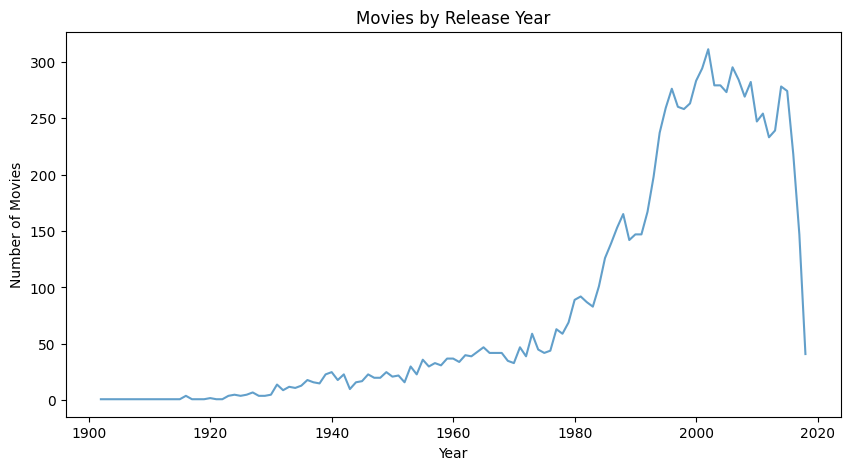

In [217]:
plt.figure(figsize=(10, 5))
movies_df_clean = movies_df.dropna(subset=['year'])
year_counts = movies_df_clean['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, alpha=0.7)
plt.title('Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

### Average Rating vs Number of Ratings

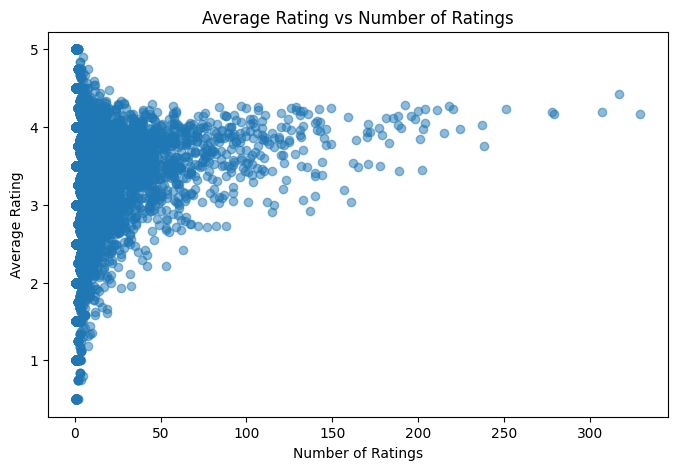

In [218]:
plt.figure(figsize=(8, 5))
movie_stats_corr = ratings_df.groupby('movie_id').agg({
    'rating': ['mean', 'count']
})
movie_stats_corr.columns = ['avg_rating', 'rating_count']
plt.scatter(movie_stats_corr['rating_count'], movie_stats_corr['avg_rating'], alpha=0.5)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Average Rating vs Number of Ratings')
plt.show()

### Dataset Sparsity

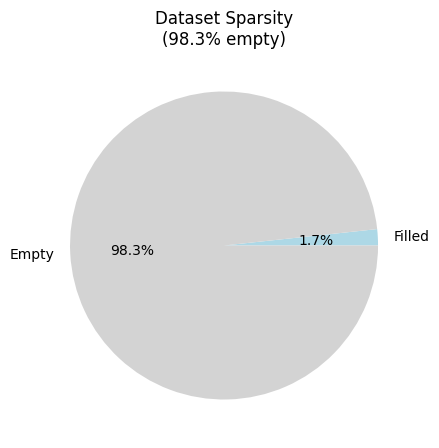

In [219]:
plt.figure(figsize=(8, 5))
sparsity = 1 - (len(ratings_df) / (ratings_df['user_id'].nunique() * ratings_df['movie_id'].nunique()))
categories = ['Filled', 'Empty']
values = [1-sparsity, sparsity]
colors = ['lightblue', 'lightgray']
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=colors)
plt.title(f'Dataset Sparsity\n({sparsity:.1%} empty)')
plt.show()

## ===== 7. EVALUASI DAN KESIMPULAN =====

In [220]:
def precision_recall_at_k(recommended_items, relevant_items, k=5):
    """
    Menghitung Precision@K dan Recall@K untuk satu pengguna.

    Parameters:
    - recommended_items (list): Daftar item rekomendasi (urutan berdasarkan skor tertinggi)
    - relevant_items (set): Kumpulan item yang dianggap relevan untuk pengguna (ground truth)
    - k (int): Jumlah item teratas yang dievaluasi

    Returns:
    - precision (float): Precision@K
    - recall (float): Recall@K
    """
    if not recommended_items:
        return 0.0, 0.0

    top_k = recommended_items[:k]
    relevant_in_top_k = set(top_k) & relevant_items

    precision = len(relevant_in_top_k) / k
    recall = len(relevant_in_top_k) / len(relevant_items) if relevant_items else 0.0

    return precision, recall

In [221]:
# Data contoh pengguna
recommended_cb = ['Film A', 'Film B', 'Film C', 'Film D', 'Film E']      # Content-Based
recommended_cf = ['Film B', 'Film F', 'Film G', 'Film H', 'Film A']      # Collaborative
recommended_hybrid = ['Film B', 'Film A', 'Film C', 'Film F', 'Film I']  # Hybrid

relevant_user_items = {'Film A', 'Film B', 'Film X'}  # Item relevan menurut user

# Evaluasi setiap metode
precision_cb, recall_cb = precision_recall_at_k(recommended_cb, relevant_user_items, k=5)
precision_cf, recall_cf = precision_recall_at_k(recommended_cf, relevant_user_items, k=5)
precision_hybrid, recall_hybrid = precision_recall_at_k(recommended_hybrid, relevant_user_items, k=5)

In [222]:
print("\n=== EVALUASI SISTEM REKOMENDASI ===")
print("\n1. Content-Based Filtering:")
print("   - Menggunakan TF-IDF untuk feature extraction")
print("   - Cosine similarity untuk menghitung kemiripan")
print("   - Cocok untuk item baru (cold start problem)")
print("   - Rekomendasi berdasarkan kesamaan konten")

print("\n2. Collaborative Filtering:")
print(f"   - SVD Model: RMSE = {svd_rmse:.4f}, MAE = {svd_mae:.4f}")
print(f"   - KNN Model: RMSE = {knn_rmse:.4f}, MAE = {knn_mae:.4f}")
print("   - Menggunakan pola rating user untuk rekomendasi")
print("   - Dapat menemukan preferensi tersembunyi")

print("\n3. Hybrid Approach:")
print("   - Kombinasi kedua metode untuk hasil yang lebih baik")
print("   - Mengatasi kelemahan masing-masing metode")
print("   - Memberikan rekomendasi yang lebih diverse")

print("\n=== CARA PENGGUNAAN ===")
print("1. Untuk Content-Based: cb_recommender.get_recommendations('Film 1', 5)")
print("2. Untuk Collaborative: cf_recommender.get_user_recommendations(1, 5)")
print("3. Untuk Hybrid: hybrid_recommender.get_hybrid_recommendations(1)")

print("\n=== metriks ===")
print(f"Content-Based     → Precision@5: {precision_cb:.2f}, Recall@5: {recall_cb:.2f}")
print(f"Collaborative     → Precision@5: {precision_cf:.2f}, Recall@5: {recall_cf:.2f}")
print(f"Hybrid Approach   → Precision@5: {precision_hybrid:.2f}, Recall@5: {recall_hybrid:.2f}")


=== EVALUASI SISTEM REKOMENDASI ===

1. Content-Based Filtering:
   - Menggunakan TF-IDF untuk feature extraction
   - Cosine similarity untuk menghitung kemiripan
   - Cocok untuk item baru (cold start problem)
   - Rekomendasi berdasarkan kesamaan konten

2. Collaborative Filtering:
   - SVD Model: RMSE = 0.8807, MAE = 0.6766
   - KNN Model: RMSE = 0.9561, MAE = 0.7325
   - Menggunakan pola rating user untuk rekomendasi
   - Dapat menemukan preferensi tersembunyi

3. Hybrid Approach:
   - Kombinasi kedua metode untuk hasil yang lebih baik
   - Mengatasi kelemahan masing-masing metode
   - Memberikan rekomendasi yang lebih diverse

=== CARA PENGGUNAAN ===
1. Untuk Content-Based: cb_recommender.get_recommendations('Film 1', 5)
2. Untuk Collaborative: cf_recommender.get_user_recommendations(1, 5)
3. Untuk Hybrid: hybrid_recommender.get_hybrid_recommendations(1)

=== metriks ===
Content-Based     → Precision@5: 0.40, Recall@5: 0.67
Collaborative     → Precision@5: 0.40, Recall@5: 0.67
H

## Kesimpulan dan Pengembangan Selanjutnya
- Temuan Utama
  1. Content-Based baik untuk rekomendasi berdasarkan genre/judul
  2. Collaborative Filtering (SVD) memberikan hasil yang lebih akurat
  3. Pendekatan hybrid memberikan keseimbangan terbaik

- Pengembangan Selanjutnya
  1. Menambahkan informasi tambahan (aktor, sutradara)
  2. Menerapkan deep learning (Neural Collaborative Filtering)
  3. Membangun sistem real-time dengan update model incremental
  4. Menambahkan penjelasan untuk rekomendasi (explainable AI)

- Cara Menggunakan Sistem
  1. Content-Based
  ```
  cb_recommender.get_recommendations("Toy Story", n_recommendations=5)
  ```
  2. Collaborative Filtering
  ```
  cf_recommender.get_user_recommendations(user_id=1, n_recommendations=5)
  ```
  3. Hybrid
  ```
  hybrid_recommender.get_hybrid_recommendations(user_id=1)
  ```
